# Importar Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar Dados

In [ ]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Exploratory Data Analysis

In [ ]:
dataset['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Padronização dos Dados

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_treino_pad = sc.fit_transform(X_treino)
X_teste_pad = sc.transform(X_teste)

# Regressão Logística

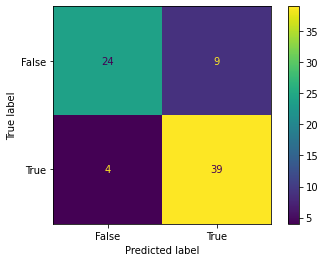

In [ ]:
from sklearn.linear_model import LogisticRegression
regressao_logistica = LogisticRegression(random_state = 0)
regressao_logistica.fit(X_treino_pad, y_treino)

y_regressao_logistica = regressao_logistica.predict(X_teste_pad)

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, y_regressao_logistica)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 


# Método KNN

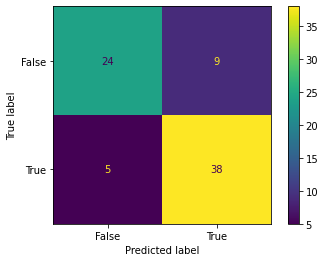

In [ ]:
from pandas.core.ops.mask_ops import kleene_and
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_treino_pad, y_treino)

y_knn = knn.predict(X_teste_pad)

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, y_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 


# Método SVM

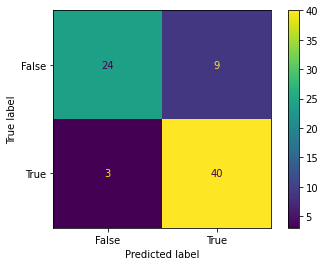

In [ ]:
from sklearn.svm import SVC
modelo_svm = SVC(kernel = 'linear', random_state = 0, C = 5, gamma = 0.001, probability = True)
modelo_svm.fit(X_treino_pad, y_treino)

y_svm = modelo_svm.predict(X_teste_pad)

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, y_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 

# Árvore de Decisão

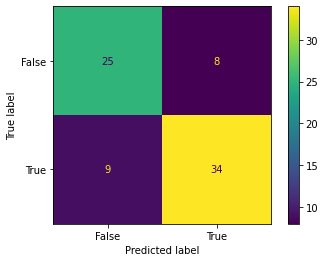

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(X_treino_pad, y_treino)

y_arvore = arvore.predict(X_teste_pad)

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, y_arvore)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 

# Floresta Aleatória

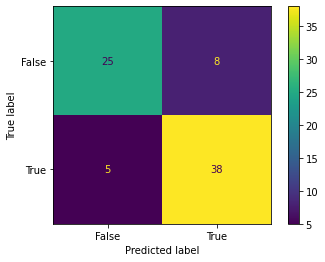

In [ ]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
floresta.fit(X_treino_pad, y_treino)

y_floresta = floresta.predict(X_teste_pad)

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, y_floresta)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show() 

# Comparação da pontuação

In [ ]:
# Regressão Logistica
print("Regressão Logística")
print(f"Pontuação: {accuracy_score(y_teste, y_regressao_logistica)}\n")

# KNN
print("KNN")
print(f"Pontuação: {accuracy_score(y_teste, y_knn)}\n")

# SVM
print("SVM")
print(f"Pontuação: {accuracy_score(y_teste, y_svm)}\n")

# Arvore de Decisão
print("Árvore de Decisão")
print(f"Pontuação: {accuracy_score(y_teste, y_arvore)}\n")

# Floresta Aleatória
print("Floresta Aleatória")
print(f"Pontuação: {accuracy_score(y_teste, y_floresta)}\n")


Regressão Logística
Pontuação: 0.8289473684210527

KNN
Pontuação: 0.8157894736842105

SVM
Pontuação: 0.8421052631578947

Árvore de Decisão
Pontuação: 0.7763157894736842

Floresta Aleatória
Pontuação: 0.8289473684210527

